##### CME 364a Final Exam

In [1]:
import warnings
warnings.filterwarnings("ignore", category = FutureWarning)
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

Problem 1

In [2]:
Q = 15  # Battery capacity in GW
C = 15 / 4  # Maximum charge/discharge rate in GW
a = 0.1  # Coefficient for linear term in quadratic cost function in $10^6/GW
b = 0.005  # Coefficient for quadratic term in quadratic cost function in $10^6/GW^2

l = np.asarray(
    [21.34191954, 21.18082759, 20.96743678, 20.76724138, 20.60328736,
     20.47901149, 20.33221839, 20.20188506, 20.1091954, 20.06005747,
     19.98218391, 19.91656322, 19.91108046, 19.92598851, 19.9263908,
     19.95235632, 20.07229885, 20.25916092, 20.40158621, 20.57654023,
     20.91581609, 21.30312644, 21.59070115, 21.91572414, 22.44517241,
     22.96125287, 23.23689655, 23.47072414, 23.7072069, 23.9123908,
     23.9323908, 23.89454023, 23.84212644, 23.7435977, 23.47114943,
     23.17532184, 22.94258621, 22.71243678, 22.38668966, 22.08251724,
     21.80866667, 21.53998851, 21.2727931, 21.03797701, 20.8167931,
     20.62733333, 20.46255172, 20.29644828, 20.13751724, 20.0298046,
     19.91989655, 19.83633333, 19.75285057, 19.72950575, 19.70543678,
     19.72454023, 19.72749425, 19.75965517, 19.81554023, 19.93401149,
     20.05833333, 20.22910345, 20.43187356, 20.68208046, 20.89424138,
     21.20185057, 21.58913793, 22.02983908, 22.41070115, 22.85716092,
     23.38570115, 23.94273563, 24.44466667, 24.87712644, 25.19521839,
     25.44010345, 25.65931034, 25.90294253, 26.06342529, 26.07808046,
     25.96606897, 25.814, 25.63070115, 25.41873563, 25.21206897,
     25.02482759, 24.75267816, 24.44406897, 24.0662069, 23.6843908,
     23.31312644, 22.94794253, 22.58410345, 22.2401954, 21.91117241,
     21.60796552])

s = np.asarray(
    [-0.03617241, -0.03613793, -0.03657471, -0.03378161, -0.03536782,
     -0.03536782, -0.03535632, -0.03531034, -0.03547126, -0.03557471,
     -0.03565517, -0.03601149, -0.03644828, -0.03697701, -0.03742529,
     -0.03809195, -0.03837931, -0.03843678, -0.03847126, -0.03865517,
     -0.03906897, -0.03950575, -0.03977011, -0.03964368, -0.03295402,
        0.03156322,  0.24817241,  0.68012644,  1.34516092,  2.34498851,
        3.58345977,  4.82156322,  6.09688506,  7.20993103,  8.09786207,
        8.61782759,  9.16962069,  9.63973563,  9.79171264,  9.92125287,
     10.1645977, 10.23402299, 10.20718391, 10.16213793, 10.15095402,
     10.08826437, 10.09511494, 10.00224138,  9.96237931,  9.94972414,
        9.90524138,  9.85172414,  9.79181609,  9.75329885,  9.64002299,
        9.5753908,  9.47358621,  9.32724138,  9.27497701,  9.19827586,
        9.04288506,  8.85916092,  8.64457471,  8.42649425,  7.93597701,
        7.36075862,  6.97835632,  6.30435632,  5.39842529,  4.571,
        3.81128736,  2.97521839,  2.09649425,  1.31252874,  0.66016092,
        0.23991954,  0.04734483, -0.02125287, -0.03608046, -0.03522989,
     -0.03489655, -0.03495402, -0.03574713, -0.03547126, -0.03489655,
     -0.03428736, -0.03433333, -0.03434483, -0.03445977, -0.03554023,
     -0.03548276, -0.03541379, -0.0356092, -0.03498851, -0.03567816,
     -0.03563218])

n = l - s

In [3]:
J_ramp_no_storage = 4*np.max(np.abs(np.roll(n, -1) - n))
#Variables 
T = len(n)
q = cp.Variable(T, nonneg = True)
c = cp.Variable(T)
g = cp.Variable(T)

#Objective and constraints
objective = cp.Minimize(cp.sum([a * g[t] + b * g[t]**2 for t in range(T)]))
constraints = []
constraints += [g[t] == n[t] + c[t] for t in range(T)]
constraints += [q[t+1] == q[t] + 0.25*c[t] for t in range(T-1)]
constraints += [q[0] == q[95] + 0.25*c[95]]
constraints += [q <= Q]
constraints += [cp.abs(c) <= C]

ramp_differences = cp.abs(g[1:] - g[:-1])
J_ramp = 4*cp.maximum(cp.max(ramp_differences), cp.abs(g[1] - g[95]))
constraints += [J_ramp <= 0.5 * J_ramp_no_storage]

problem = cp.Problem(objective, constraints)
problem.solve()

print('The cost with storage:', np.round(objective.value, 2))
print('The maximum ramp rate with storage:', np.round(J_ramp.value, 2))
print('The maximum ramp rate with no storage:', np.round(J_ramp_no_storage, 2))

The cost with storage: 343.72
The maximum ramp rate with storage: 2.79
The maximum ramp rate with no storage: 5.57


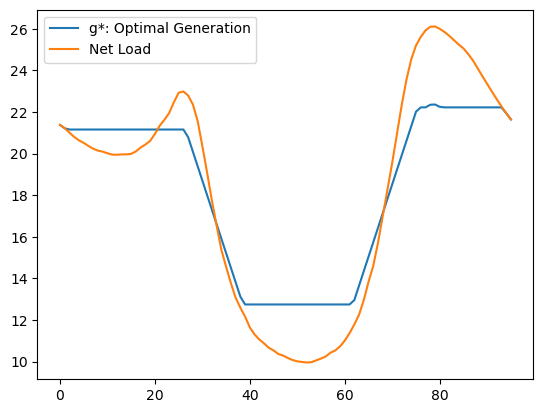

In [4]:
plt.plot(range(T), g.value, label = 'g*: Optimal Generation')
plt.plot(range(T), n, label = 'Net Load')
plt.legend()
plt.show()

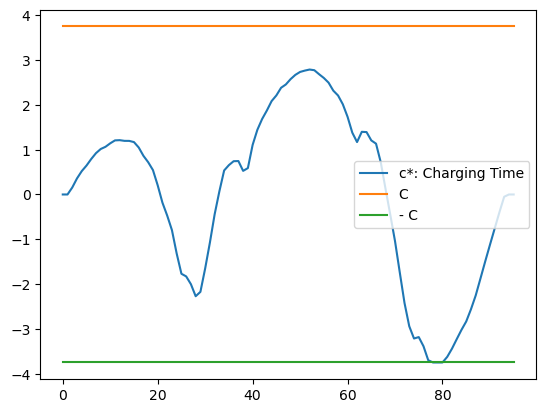

In [5]:
plt.plot(range(T), c.value, label = 'c*: Charging Time')
plt.plot(range(T), C*np.ones(T), label = 'C')
plt.plot(range(T), -C*np.ones(T), label = '- C')
plt.legend()
plt.show()
plt.show()

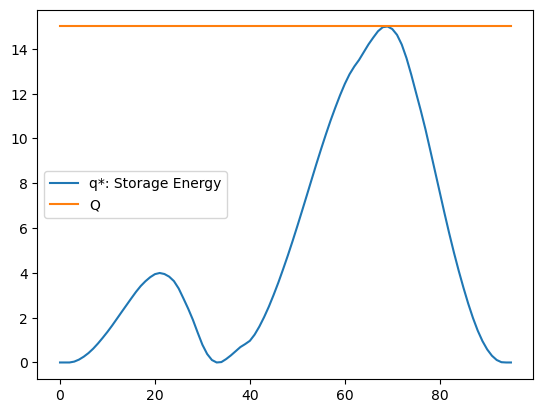

In [6]:
plt.plot(range(T), q.value, label = 'q*: Storage Energy')
plt.plot(range(T), Q*np.ones(T), label = 'Q')
plt.legend()
plt.show()
plt.show()

Problem 2

In [7]:
A = np.array([[0.98, 0.06, -0.12], [-0.02, 0.95, 0.28], [0.14, -0.27, 0.94]])
B = np.array([[0.3], [0.6], [0.1]])

n = 3
m = 1
T = 50

In [8]:
def orig_optimal_prob(z):
 
    x = cp.Variable((n,T))
    u = cp.Variable((m,T))
    objective = cp.Minimize(cp.sum(cp.norm(x, axis = 0)**2) + cp.sum_squares(cp.norm(u, axis=0)))
    constraints = []
    constraints += [x[:,t+1] == A@x[:,t] + B@u[:,t] for t in range (T-1)]
    constraints += [x[:,0] == z]
    constraints += [u <= 0.1]
    constraints += [u >= -0.1]
    
    problem = cp.Problem(objective, constraints)
    problem.solve()

    return objective.value

In [9]:
def do_gradient(z, h = 1e-6):
    gradient = []

    F_z = orig_optimal_prob(z)

    for i in range(n):
        z_new = np.copy(z)
        z_new[i] += h
        F_z_h = orig_optimal_prob(z_new)

        gradient += [(F_z_h - F_z)/h]

    return np.array(gradient)

In [10]:
#3 random initializations of z
z_initializations = []

for i in range(3):
    x = np.random.normal(0, 1, n)
    norm_x = np.linalg.norm(x)

    z = x / (2*norm_x)
    z_initializations += [z]

F_z_iterations = [] #To track for each of the 5 different starting points to get worst case late
z_iterations = []

Text(0, 0.5, 'F(z)')

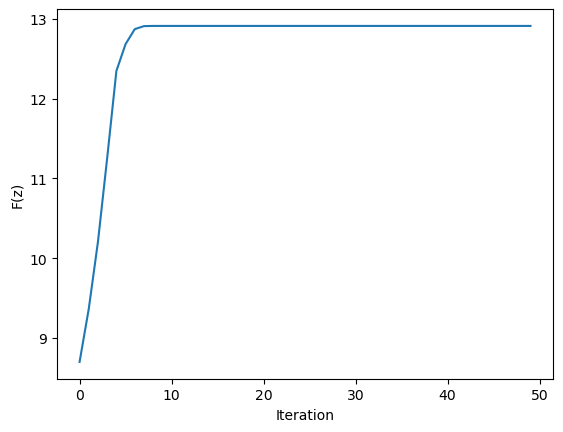

In [11]:
#Generate initial guess 1
np.random.seed(121)
x = np.random.normal(0, 1, n)
norm_x = np.linalg.norm(x)

z_k = x / (norm_x)

z_vals = []
F_zk = []

for k in range(50):

    z = cp.Variable(n)
    
    objective = cp.Maximize(orig_optimal_prob(z_k)+do_gradient(z_k).T@(z-z_k))
    constraints = [cp.norm(z) <= 1]

    problem = cp.Problem(objective, constraints)
    problem.solve()

    z_vals += [z.value]
    F_zk += [orig_optimal_prob(z.value)]
    z_k = z.value


F_z_iterations += [F_zk[-1]] #To track for each of the 5 different starting points to get worst case late
z_iterations += [z_vals[-1]]
#Plot
plt.plot(range(len(F_zk)), F_zk)
plt.xlabel('Iteration')
plt.ylabel('F(z)')

Text(0, 0.5, 'F(z)')

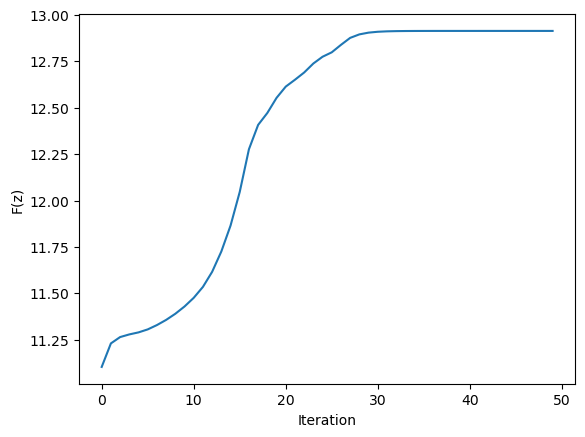

In [12]:
#Generate initial guess 2
np.random.seed(122)
x = np.random.normal(0, 1, n)
norm_x = np.linalg.norm(x)

z_k = x / (norm_x)

z_vals = []
F_zk = []

for k in range(50):

    z = cp.Variable(n)
    
    objective = cp.Maximize(orig_optimal_prob(z_k)+do_gradient(z_k).T@(z-z_k))
    constraints = [cp.norm(z) <= 1]

    problem = cp.Problem(objective, constraints)
    problem.solve()

    z_vals += [z.value]
    F_zk += [orig_optimal_prob(z.value)]
    z_k = z.value


F_z_iterations += [F_zk[-1]] #To track for each of the 5 different starting points to get worst case late
z_iterations += [z_vals[-1]]
#Plot
plt.plot(range(len(F_zk)), F_zk)
plt.xlabel('Iteration')
plt.ylabel('F(z)')

Text(0, 0.5, 'F(z)')

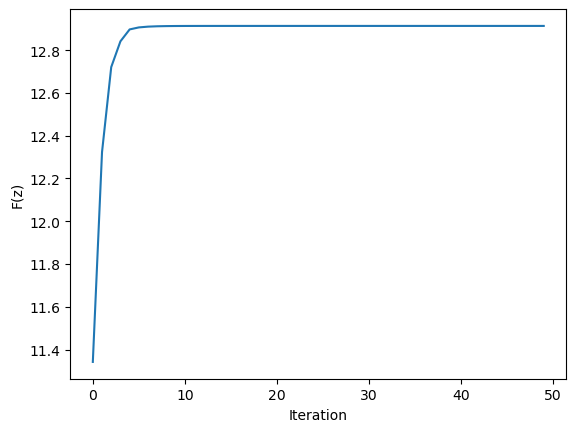

In [13]:
#Generate initial guess 3
np.random.seed(124)
x = np.random.normal(0, 1, n)
norm_x = np.linalg.norm(x)

z_k = x / (norm_x)

z_vals = []
F_zk = []

for k in range(50):

    z = cp.Variable(n)
    
    objective = cp.Maximize(orig_optimal_prob(z_k)+do_gradient(z_k).T@(z-z_k))
    constraints = [cp.norm(z) <= 1]

    problem = cp.Problem(objective, constraints)
    problem.solve()

    z_vals += [z.value]
    F_zk += [orig_optimal_prob(z.value)]
    z_k = z.value


F_z_iterations += [F_zk[-1]] #To track for each of the 5 different starting points to get worst case late
z_iterations += [z_vals[-1]]
#Plot
plt.plot(range(len(F_zk)), F_zk)
plt.xlabel('Iteration')
plt.ylabel('F(z)')

The worst case cost: 12.913620078925602
The associated worst case initial condition: [ 0.58779894  0.16360003 -0.79229251]


Text(0, 0.5, 'Value of Trajectory')

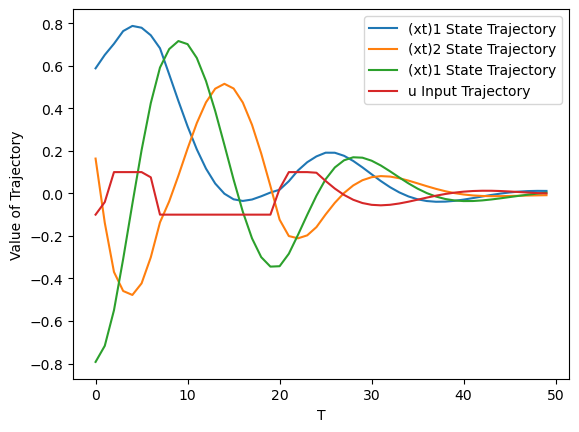

In [14]:
#Find worst case cost out of the 3 runs
max_index = F_z_iterations.index(max(F_z_iterations))

print('The worst case cost:', F_z_iterations[max_index])
print('The associated worst case initial condition:', z_iterations[max_index])

#Plot for the state and input trajectories of worst-case cost
x = cp.Variable((n,T))
u = cp.Variable((m,T))
objective = cp.Minimize(cp.sum(cp.norm(x, axis = 0)**2) + cp.sum_squares(cp.norm(u, axis=0)))
constraints = []
constraints += [x[:,t+1] == A@x[:,t] + B@u[:,t] for t in range (T-1)]
constraints += [x[:,0] == z_iterations[max_index]]
constraints += [u <= 0.1]
constraints += [u >= -0.1]

problem = cp.Problem(objective, constraints)
problem.solve()

plt.plot(range(T), x[0].value, label = '(xt)1 State Trajectory')
plt.plot(range(T), x[1].value, label = '(xt)2 State Trajectory')
plt.plot(range(T), x[2].value, label = '(xt)1 State Trajectory')
plt.plot(range(T), u[0].value, label = 'u Input Trajectory')
plt.legend()
plt.xlabel('T')
plt.ylabel('Value of Trajectory')

Problem 3

In [15]:
### Data ###
# This data file consists of parameters for the flight simulator problem. Some
# of the parameters are inspired by the paper "Grant, P., & Haycock, B. (2008).
# Effect of jerk and acceleration on the perception of motion strength. Journal
# of Aircraft, 45(4), 1190–1197." It contains the following parameters:
"""
- h: time step (s)
- P_max: position limit (m)
- position: T-array of reference position (m)
"""

h = 0.1
P_max = 0.6
position = np.array(
    [0.0, 0.03302791, 0.12840479, 0.3084541, 0.5859962, 0.96290951, 1.42991972, 1.9676406, 2.54874986, 3.14105557, 3.71110918, 4.22795958, 4.66662684, 5.01090576,
     5.25518468, 5.3994636, 5.44374253, 5.38802145, 5.23230037, 4.9765793, 4.62085822, 4.16513714, 3.60941606, 2.95369499, 2.19797391, 1.34225283, 0.38512884,
     -0.67744937, -1.85172678, -3.14544116, -4.56695465, -6.12431524, -7.82435349, -9.67191597, -11.66932126, -13.81609974, -16.10904632, -18.54258016, -21.10937096, -23.80116177,
    ]
)

In [16]:
#Calculate jref
vref = (position[1:] - position[:-1])/h
aref = (vref[1:] - vref[:-1])/h
jref = (aref[1:] - aref[:-1])/h

#Variable
T = len(position)
p = cp.Variable(T)
v = cp.Variable(T-1)
a = cp.Variable(T-2)
j = cp.Variable(T-3)

#Objective and Constraints
objective = cp.Minimize(cp.sum_squares(j - jref))
constraints = []
constraints += [v[t] == (p[t+1] - p[t])/h for t in range(T-1)]
constraints += [a[t] == (v[t+1] - v[t])/h for t in range(T-2)]
constraints += [j[t] == (a[t+1] - a[t])/h for t in range(T-3)]
constraints += [cp.norm(p, 'inf') <= P_max]

problem = cp.Problem(objective, constraints)
problem.solve(solver = cp.ECOS) #Solver not working, trying another one


#Output
print(p.value)

[ 0.60000002  0.20413806 -0.13178085 -0.38516663 -0.54239907 -0.60000003
 -0.56457765 -0.45151888 -0.28300579 -0.08514125  0.11547199  0.29529314
  0.43712511  0.53272582  0.58443499  0.60000002  0.58677233  0.55151509
  0.50042788  0.43917113  0.37289067  0.30624222  0.24341594  0.18816089
  0.14380954  0.11330232  0.0978092   0.09550867  0.10206701  0.11136367
  0.11638419  0.11018324  0.08681237  0.04211111 -0.02572456 -0.11585746
 -0.22483746 -0.3469367  -0.47475136 -0.6       ]


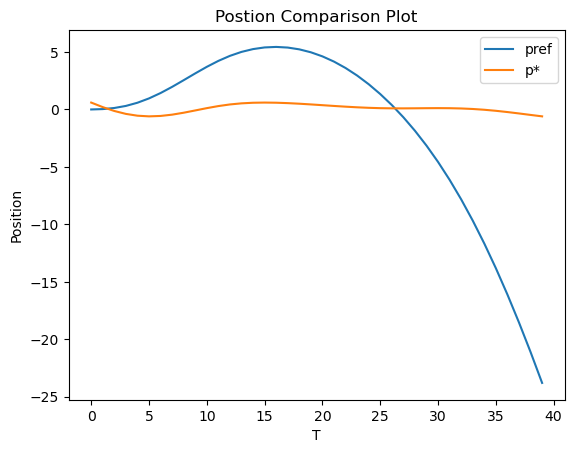

In [17]:
plt.plot(range(T), position, label = 'pref')
plt.plot(range(T), p.value, label = 'p*')
plt.legend()
plt.xlabel('T')
plt.ylabel('Position')
plt.title('Postion Comparison Plot')
plt.show()

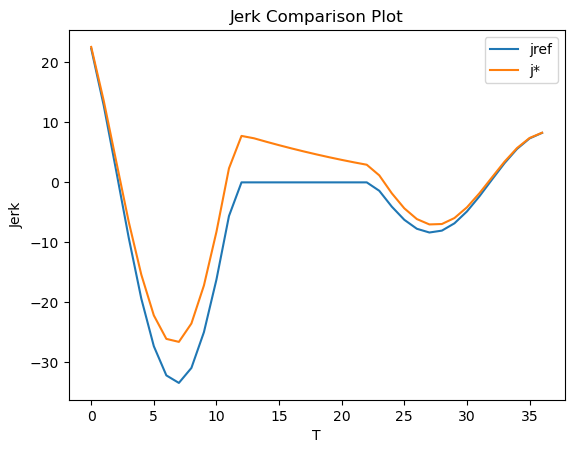

In [18]:
plt.plot(range(T-3), jref, label = 'jref')
plt.plot(range(T-3), j.value, label = 'j*')
plt.legend()
plt.xlabel('T')
plt.ylabel('Jerk')
plt.title('Jerk Comparison Plot')
plt.show()

Problem 4

In [19]:
### Data ###
# This data file contains stock market data for Apple Inc. (AAPL) from February
# 8, 2024, to February 22, 2024. The data is from Yahoo Finance and contains the
# following parameters:
"""
- T: number of periods (days)
- Q: desired total purchase quantity (millions of shares)
- p1: initial share price (USD)
- sigma: price volatility (USD)
- pi_max: maximum participation rate
- gamma: risk aversion parameter
- v: T-vector of market volumes (millions of shares)
"""

T = 10
Q = 10 
p1 = 188 
sigma = 2.1 
pi_max = 0.05 
gamma = 0.05 
v = np.array(
    [41, 45, 42, 57, 55, 65, 50, 54, 42, 52]
)

In [20]:
#Make Sigma
Sigma = np.zeros((T, T))
for k in range(T):
    for l in range(T):
        Sigma[k, l] = sigma ** 2 * min(k, l)

#Variable
q = cp.Variable(T, nonneg = True)

#Objective and constraints
C = cp.sum([sigma*cp.power(q[t], 1.5)*cp.inv_pos(cp.sqrt(v[t])) for t in range(T)])
R = cp.quad_form(q, Sigma)
objective = cp.Minimize(C + gamma*R)
constraints = [q >= 0, cp.sum(q) == Q]
constraints += [q[t] / v[t] <= pi_max for t in range(T)]


problem = cp.Problem(objective, constraints)
problem.solve()

print('Optimal volatility:', np.round(np.sqrt(R.value), 3))
print('Optimal transacation cost:', np.round(C.value, 3))
print('Normalized volatility:', np.round(np.sqrt(R.value)/(p1*Q), 4))
print('Normalized transaction cost:', np.round(C.value/(p1*Q), 4))

Optimal volatility: 21.977
Optimal transacation cost: 4.408
Normalized volatility: 0.0117
Normalized transaction cost: 0.0023


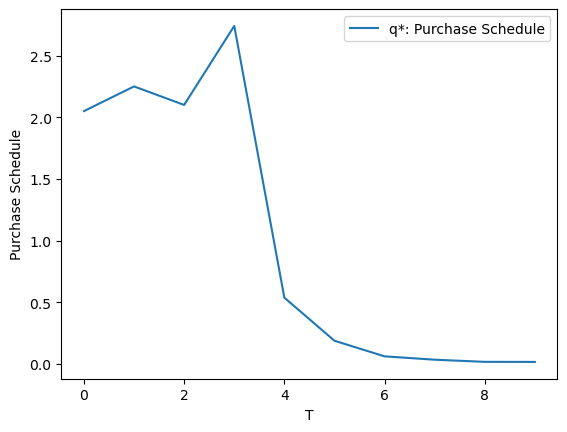

In [21]:
#Plot
plt.plot(range(T), q.value, label = 'q*: Purchase Schedule')
plt.legend()
plt.xlabel('T')
plt.ylabel('Purchase Schedule')
plt.show()

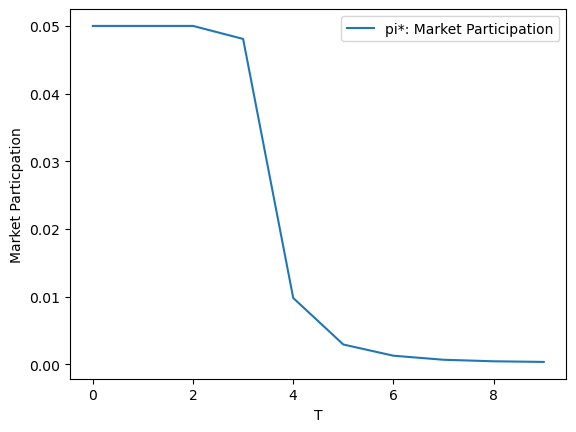

In [22]:
#Plot
plt.plot(range(T), q.value/v, label = 'pi*: Market Participation')
plt.legend()
plt.xlabel('T')
plt.ylabel('Market Particpation')
plt.show()

Problem 5

In [23]:
### Data ###
"""
- T: number of periods (months)
- K: number of CDs
- l: T-array of liabilities
- M: K-array of maturities (months)
- R: K-array of monthly interest rates
- C1: initial cash (in USD)
"""

T = 120  
K = 6  
l = np.array(
    [5.83603919, 1.49205924, 2.66109578, 9.40172515, 6.47247125, 0.37633413, 2.58593829, 0.85954061, 0.90192956, 1.50771989, 1.15493443, 4.28137195, 2.14049632, 1.12938701,
    1.55871729, 1.3960884, 4.45523172, 0.8145184, 1.36761412, 0.42566793, 0.07784856, 1.92248495, 2.37366743, 0.47608207, 9.67702601, 0.23354846, 1.04682159, 0.82929126,
    4.63102958, 4.34644717, 1.16759657, 1.45960014, 0.41156606, 0.13795931, 0.70616091, 1.16923416, 3.42222417, 3.32802771, 0.67886919, 0.73911426, 0.35044449, 0.24170968,
    0.18154165, 7.0341397, 0.60070448, 0.64527784, 0.28570503, 2.17600441, 0.19911, 0.80836606, 0.408417, 1.47241292, 0.60001229, 0.30708454, 0.97221119, 1.53469532, 1.06877937,
    1.35319965, 0.53029486, 0.6957665, 0.51045109, 0.69798814, 0.44346062, 0.17794467, 1.19413986, 0.66912731, 0.19589072, 1.58848742, 0.40361317, 1.05331823, 2.07319431, 
    1.13767068, 3.12489501, 0.29088542, 1.49532211, 0.50418597, 0.41861772, 0.56054281, 0.73230914, 1.05777256, 0.31187593, 2.46163678, 1.59306915, 0.2151879, 4.42934711, 
    6.65846632, 3.25040489, 0.835333, 0.34275046, 2.87040096, 0.66819385, 3.39547978, 1.23155177, 2.65551613, 1.42813072, 2.02703304, 1.01055534, 5.96476998, 1.13531721,
    1.49479543, 6.57418553, 0.25982185, 0.28069545, 2.63635349, 0.30939905, 6.98399558, 0.66125285, 0.47357035, 6.84105546, 4.39520771, 6.47247753, 2.4745156, 0.42264374,
    6.75352745, 0.7649052, 2.23101446, 2.5786138, 0.85640653, 1.84795453, 2.51483368,]
)
M = np.array([1, 3, 6, 12, 24, 36])  
R = np.array([1, 2, 3, 4, 5, 6]) / 100 / 12  
C1 = l.sum()  

In [24]:
T = len(l)
K = len(M)
#Variables 
C = cp.Variable(T+1, nonneg = True)
F = cp.Variable(T)
G = cp.Variable(T)
z = cp.Variable((T,K), nonneg = True)

#Objective and Constraints
objective = cp.Maximize(C[-1])

constraints = []
for t in range(T):
    constraints += [C[t+1] == C[t] - l[t] - F[t] + G[t]]
    constraints += [F[t] == cp.sum(z[t,:])]
    
constraints += [C[0] == C1]

for t in range(T):
    for k in range(K):
        if t + M[k] > T:
            constraints += [z[t,k] == 0]


for t in range(1,T+1):
    G_terms = []
    for k in range(K):
        for tau in range(1,t):
            if t == tau + M[k]:
                G_terms.append(z[tau-1, k] * ((1 + R[k]) ** M[k]))
    constraints += [G[t-1] == cp.sum(G_terms)]

problem = cp.Problem(objective, constraints)
problem.solve()

print('The optimal final cash value:', np.round(objective.value, 2))

The optimal final cash value: 91.33


In [25]:
#Compare the optimal policy to a baseline policy that invests all cash in each period in the CD with a maturity of M = 1.

#At time t pay off everyting and then invest (1+R[0]) and get final payout at T+1

cash = C1
for t in range(T):
    cash -= l[t]
    cash *= (1+R[0])

cash *= (1+R[0])
print('Baseline policy final cash:', np.round(cash,2))
print('We can see that the optimal final cash value is significantly higher than the baseline policy')


Baseline policy final cash: 12.35
We can see that the optimal final cash value is significantly higher than the baseline policy
